In [1]:
import cobra.io
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Read model
model = cobra.io.read_sbml_model('Roseobacter-litoralis-strain-B14.SBML')

In [3]:
# Produce list of all exchanges in medium, except glucose
medium = model.medium
mediumwoglc = list(medium.keys())
mediumwoglc.remove('EX_glc__D_e')

In [4]:
# Produce empty lists for use in loop
growthrates = list()
exchangelevels = list()

In [5]:
# In this loop all exchange reactions starts at the default value of 10. for each iteration of the loop,
# all exchange reactions except glucose are lowered by 0.5 at a time. For each iteration the growth rate
# is calculated and put into the list, growthrates. The level of the exchange reactions (except glucose)
# for each iteration is put into the list exchangelevels.
c=10    # The default value of exchange reactions
for i in range(21):
    with model:
        for EX in mediumwoglc:
            medium[EX] = c
            model.medium = medium
        mumax = model.optimize().objective_value
        mumax = round(mumax,3)
        growthrates.append(mumax)
        exchangelevels.append(c)
        c = c-0.5

In [6]:
# A table showing the growth rate at the different levels of the exchange reactions in the medium,
# (exept glucose which is 10), is produced
mediumchangegrowth = pd.DataFrame({'Exchange levels': exchangelevels, 'Growth rate': growthrates})
mediumchangegrowth.set_index('Exchange levels', inplace=True)
mediumchangegrowth

,Growth rate
Exchange levels,
10.0,0.697
9.5,0.669
9.0,0.641
8.5,0.613
8.0,0.584
7.5,0.556
7.0,0.528
6.5,0.500
6.0,0.472


In [7]:
# It is seen that for mumax around 0.27, the exchange levels should be around 2.5

In [8]:
# The growth rate is also plotted as a function of the level of the exchanges

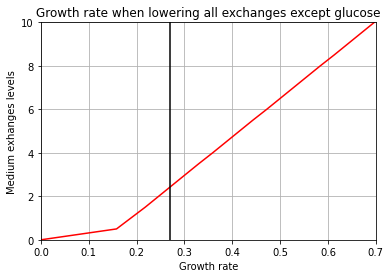

In [19]:
plt.plot(growthrates,exchangelevels,c='r',label='Growth rate')
plt.ylabel('Medium exhanges levels')
plt.xlabel('Growth rate')
plt.axvline(0.27,c='k',label='Wanted growth rate')
plt.grid(b=True)
plt.xlim([0,0.7])
plt.ylim([0,10])
plt.title("Growth rate when lowering all exchanges except glucose")
plt.savefig('Growthrateplot.png')
plt.show()

In [10]:
# In this loop all other exchanges than glucose is set to 2.5, because this will
# give the desired mumax of around 0.27
for EX in mediumwoglc:
    medium[EX] = 2.5
    model.medium = medium

In [11]:
# We now want to find which of the exchanges in the medium is limiting

In [12]:
# In this loop, each of the exchange reactions that was previously lowered, are
# now set at their default value one at a time. For each exchange reaction, the
# old growth rate, and the new growth rate resulting from the change of the
# exchange level is computed. If these two values are different, the result is
# reported.
for EX in mediumwoglc:
    medium = model.medium
    mumax = model.optimize().objective_value
    with model:
        medium[EX] = 10
        model.medium = medium
        mumaxchanged = model.optimize().objective_value
    if mumaxchanged != mumax:
        print('Changed', EX,'   old growthrate =',mumax,'    new growthrate =', mumaxchanged)

Changed EX_fe3_e    old growthrate = 0.2739712587212505     new growthrate = 0.29887773678682067
Changed EX_o2_e    old growthrate = 0.27397125872125166     new growthrate = 0.6656621778179113


In [13]:
# It is now checked if the growth rate changes if increasing glucose
with model:
    medium = model.medium
    medium['EX_glc__D_e'] = 20
    model.medium = medium
    mumaxchanged = model.optimize().objective_value
    print('Changed EX_glc__D_e     oldgrowthrate',mumax,'     new growthrate =',mumaxchanged)

Changed EX_glc__D_e     oldgrowthrate 0.27397125872125067      new growthrate = 0.4055433030964437


In [14]:
# It is seen that the reason for the decline in growth rate when lowering all
# other components than glucose in the medium i o2. Increasing glucose also
# yielded a higher growth rate. Even though the growth rate was increased by
# changing Fe3, the change is so little, that i will ignore it here.
# Increasing all other exchange reactions in the medium did not lead to an
# increase in growth rate. In this case o2 and glucose are therefore the
# limiting factors.

In [15]:
with model:
    medium = model.medium
    medium['EX_o2_e']=0
    model.medium = medium
    mu = model.optimize().objective_value
    print(mu)

0.14003961706623208


In [16]:
#It can grow anaerobically